# Homework - Sean Saito

Depth Estimation Using MRF

In [3]:
# Imports
%matplotlib inline
import numpy as np
import scipy
from scipy.misc import imread
import maxflow
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2
matplotlib.rcParams['figure.figsize'] = (15.0, 7.5)

/Users/saito/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Problem 2 - Noise reduction

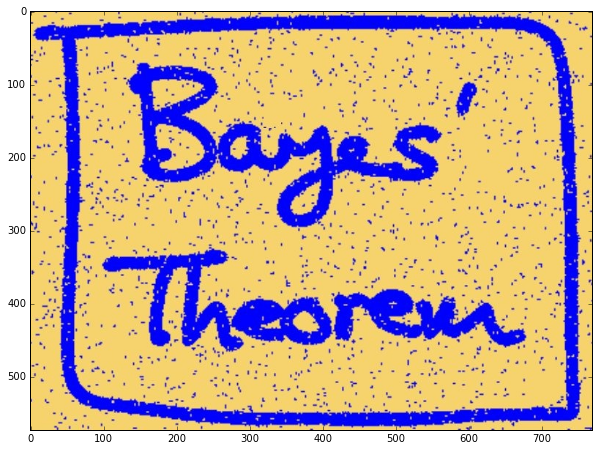

In [2]:
# img = Image.open("bayes_in.jpg")
img = cv2.imread("bayes_in.jpg", -1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
img = np.array(img)

In [4]:
threshold = 190 # Smoothness constraint
g = maxflow.Graph[int]()
nodeids = g.add_grid_nodes(img.shape)
g.add_grid_edges(nodeids, threshold)
g.add_grid_tedges(nodeids, img, 255-img)

In [5]:
# Find the maximum flow.
g.maxflow()
# Get the segments of the nodes in the grid.
sgm = g.get_grid_segments(nodeids)
img2 = np.int_(np.logical_not(sgm))

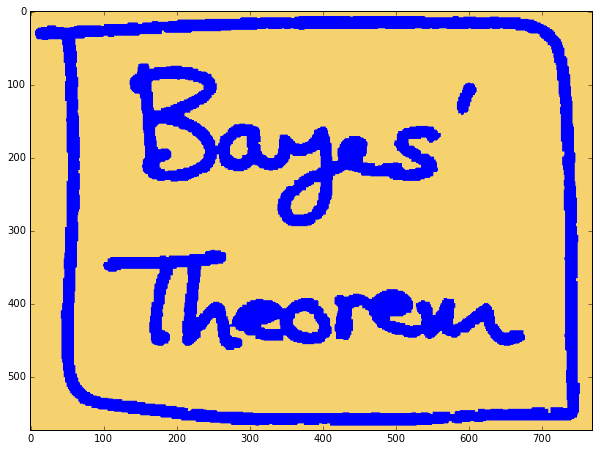

In [6]:
fg = np.array([0, 0, 255])
bg = np.array([245, 210, 110])

new_img = np.zeros_like(img2, dtype=np.uint8)
for i in range(img2.shape[0]):
    for j in range(img2.shape[1]):
        if np.mean(img2[i, j]) == 1:
            new_img[i, j] = bg
        else:
            new_img[i, j] = fg

new_img = Image.fromarray(new_img, 'RGB')
new_img.save("bayes_in_result.png")
res = Image.open("bayes_in_result.png")
plt.imshow(res)

# Problem 3 - Depth Map

In [4]:
right = np.array(Image.open("im2_right.png"))
left = np.array(Image.open("im2_left.png"))
left_cv = cv2.imread("im2_left.png")
right_cv = cv2.imread("im2_right.png")

In [5]:
left.shape

(375, 450, 3)

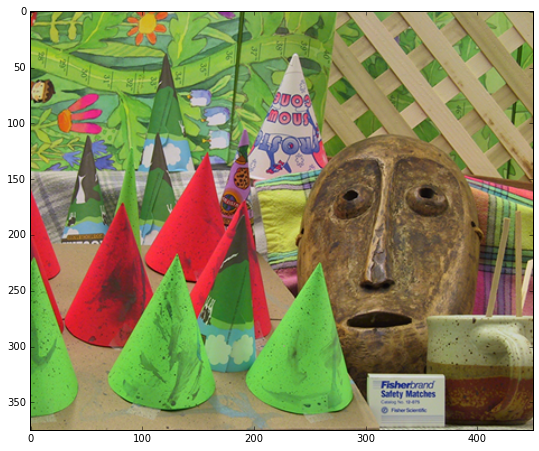

In [6]:
plt.imshow(left)

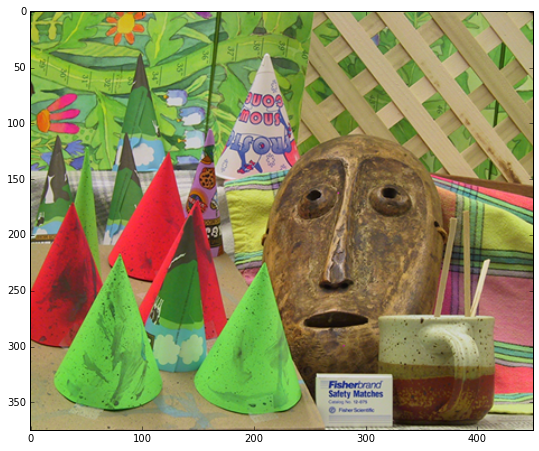

In [7]:
plt.imshow(right)

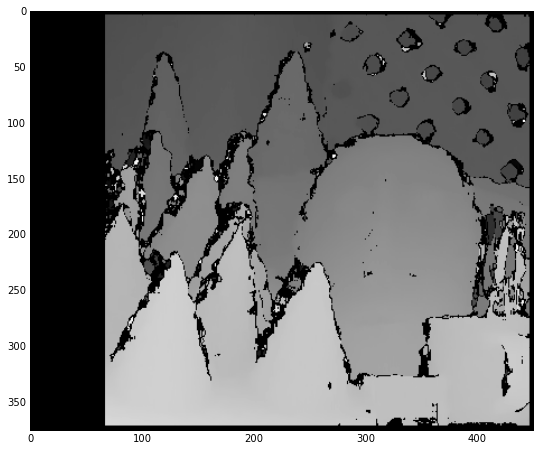

In [8]:
# CV2 example
stereo = cv2.StereoBM(cv2.STEREO_BM_BASIC_PRESET,ndisparities=64, SADWindowSize=9)
left_new = cv2.cvtColor(left_cv, cv2.COLOR_BGR2GRAY)
right_new = cv2.cvtColor(right_cv, cv2.COLOR_BGR2GRAY)
disparity = stereo.compute(left_new,right_new)
plt.imshow(disparity,'gray')
plt.show()

In [9]:
# The distance function
from numpy import linalg as LA

def dist(node, terminal):
    return LA.norm(node - terminal)

In [13]:
from maxflow import fastmin

def get_disparity_map(disparities, step, smoothness):
    # Thd fd terms for each pixel
    width = right.shape[1]
    distances = np.zeros((left.shape[0], left.shape[1], disparities))
    for i in range(left.shape[0]):
        for j in range(left.shape[1]):
            fds = []
            for k in range(0, step * disparities, step):
                if j + k < width:
                    fd = np.mean(np.absolute(np.int32(right_new[i, j]) - np.int32(left_new[i, j + k])))
                    fds.append(fd)
                else:
#                     fds.append(0)
                    fds.append(10000000)
            distances[i, j] = fds

    labels = np.ndarray(shape=(right.shape[0],right.shape[1])).astype(int)

    D = distances
    V = np.zeros(shape=(disparities, disparities))

    # Prior terms
    for i in range(0, disparities):
        for j in range(0, disparities):
            V[i][j] = abs(i-j) * smoothness

    max_cycles = 1000
    try:
        alpha_expansion = fastmin.aexpansion_grid(D, V, max_cycles, labels)
    except:
        print "Done"
    
    print "Max label ", np.max(labels)
    print "Min label ", np.min(labels)
    print "Mean ", np.mean(labels)

    res = np.zeros_like(right, dtype=np.uint8)
    for i in range(right.shape[0]):
        for j in range(right.shape[1]):
            res[i, j] = labels[i, j] * 5

    return res

In [16]:
res = get_disparity_map(60, 1, 5)

Cycle 0
Energy of the last cut (α=0): 6447691.0 (Improved!)
Energy of the last cut (α=1): 6107958.0 (Improved!)
Energy of the last cut (α=2): 5872537.0 (Improved!)
Energy of the last cut (α=3): 5693244.0 (Improved!)
Energy of the last cut (α=4): 5543179.0 (Improved!)
Energy of the last cut (α=5): 5414937.0 (Improved!)
Energy of the last cut (α=6): 5301787.0 (Improved!)
Energy of the last cut (α=7): 5198345.0 (Improved!)
Energy of the last cut (α=8): 5101859.0 (Improved!)
Energy of the last cut (α=9): 5012232.0 (Improved!)
Energy of the last cut (α=10): 4929928.0 (Improved!)
Energy of the last cut (α=11): 4852445.0 (Improved!)
Energy of the last cut (α=12): 4771472.0 (Improved!)
Energy of the last cut (α=13): 4693760.0 (Improved!)
Energy of the last cut (α=14): 4609919.0 (Improved!)
Energy of the last cut (α=15): 4512694.0 (Improved!)
Energy of the last cut (α=16): 4385605.0 (Improved!)
Energy of the last cut (α=17): 4245091.0 (Improved!)
Energy of the last cut (α=18): 4087244.0 (Improv

Max label  54
Min label  -9223372036854775808
Mean  -6.43313119252e+16


Energy of the last cut (α=14): 1399567.0
Energy of the last cut (α=15): 1399567.0
Energy of the last cut (α=16): 1399567.0
Energy of the last cut (α=17): 1399567.0
Energy of the last cut (α=18): 1399567.0
Energy of the last cut (α=19): 1399567.0
Energy of the last cut (α=20): 1399567.0
Energy of the last cut (α=21): 1399567.0
Energy of the last cut (α=22): 1399567.0
Energy of the last cut (α=23): 1399567.0
Energy of the last cut (α=24): 1399567.0
Energy of the last cut (α=25): 1399567.0
Energy of the last cut (α=26): 1399567.0
Energy of the last cut (α=27): 1399567.0
Energy of the last cut (α=28): 1399567.0
Energy of the last cut (α=29): 1399566.0 (Improved!)
Energy of the last cut (α=30): 1399561.0 (Improved!)
Energy of the last cut (α=31): 1399553.0 (Improved!)
Energy of the last cut (α=32): 1399553.0
Energy of the last cut (α=33): 1399553.0
Energy of the last cut (α=34): 1399553.0
Energy of the last cut (α=35): 1399553.0
Energy of the last cut (α=36): 1399553.0
Energy of the last cu

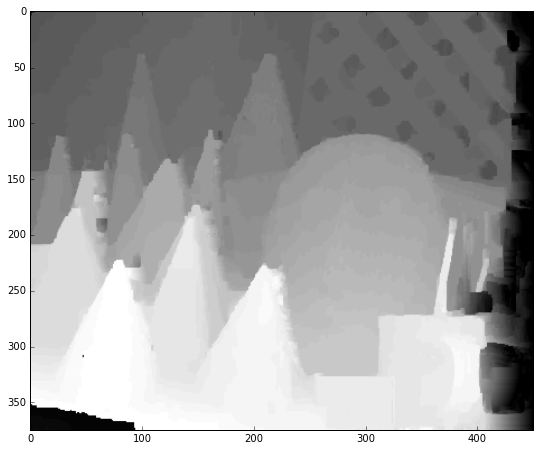

In [17]:
plt.imshow(res, cmap="Greys_r")

## Problem 4 - Depth Map Part 2

In [18]:
left = cv2.imread("street_left.jpg")
right = cv2.imread("street_right.jpg")
left_gray = cv2.cvtColor(left, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(right, cv2.COLOR_BGR2GRAY)

size = (480, 270)
Image.fromarray(left).resize(size, Image.ANTIALIAS).save("street_left_resized.jpg")
Image.fromarray(right).resize(size, Image.ANTIALIAS).save("street_right_resized.jpg")
left_resized = cv2.imread("street_left_resized.jpg")
right_resized = cv2.imread("street_right_resized.jpg")

In [19]:
left_resized.shape

(270, 480, 3)

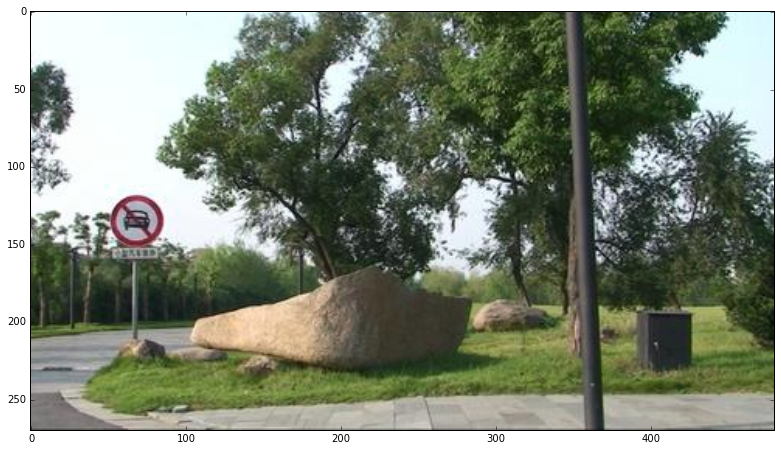

In [20]:
plt.imshow(left_resized)

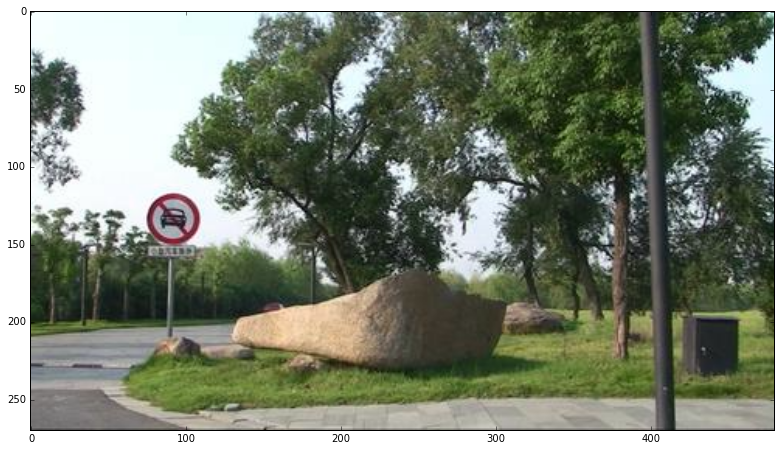

In [21]:
plt.imshow(right_resized)

In [48]:
# The matrices

K = np.array([[1221.2270770, 0.0000000, 479.5000000],
             [0.0000000, 1221.2270770, 269.5000000],
             [0.0000000, 0.0000000, 1.0000000]])
R = np.array([[1.0, 0.0, 0.0],
             [0.0, 1.0, 0.0],
             [0.0, 0.0, 1.0]])
t = np.array([0.0, 0.0, 0.0])

K_ = K
R_ = np.array([[0.9998813487, 0.0148994942, 0.0039106989],
              [-0.0148907594, 0.9998865876, -0.0022532664],
              [-0.0039438279, 0.0021947658, 0.9999898146]])
t_ = np.array([-9.9909793759, 0.2451742154, 0.1650832670])

In [64]:
camera_left = np.dot(K_, np.dot(R_.T, np.dot(R, np.linalg.pinv(K))))
camera_right = np.dot(K_, np.dot(R_, (t - t_)))

def get_next(i, j, k):
    first = np.dot(camera_left, np.array([[i, j, 1]]).T).T
    second = k * camera_right
#     first = np.dot(K_, np.dot(R_.T, np.dot(R, np.dot(np.linalg.pinv(K), np.array([[i, j, 1]]).T)))).T
#     second = np.dot(k * K_, np.dot(R_, (t - t_)))
    return (first + second).ravel()

In [65]:
i = 140; j = 100
x_ = np.matmul(np.matmul(np.matmul(np.matmul(K_, R_.T), R), np.linalg.pinv(K)), np.array([[i, j, 1]]).T).T + \
                        5000 / float(13000) * np.matmul(K_, np.matmul(R_, (t - t_)))

x_ = x_.ravel()
print x_
i_ = int(x_[0])
j_ = int(x_[1])

[  5.17747552e+03  -1.25847236e+02   9.13789390e-01]


In [66]:
get_next(140, 100, 0.005)

array([ 197.85297927,   94.75037575,    0.99819027])

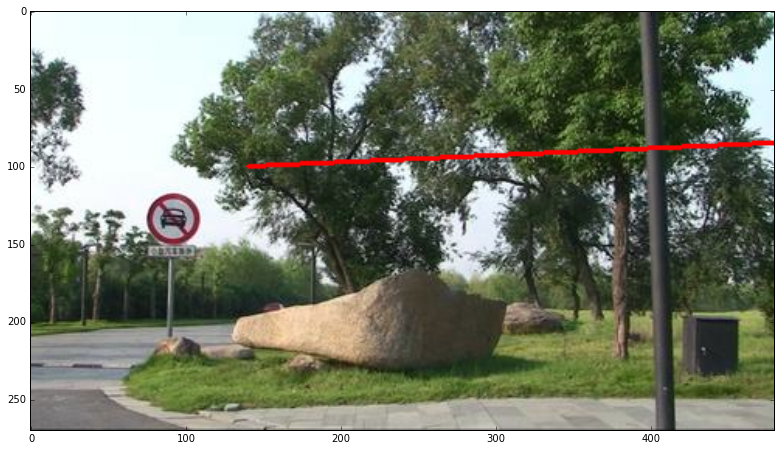

In [67]:
right = cv2.imread("street_right_resized.jpg")
cv2.line(right,(i, j),(i_, j_),(255,0,0),2)
plt.imshow(right)

The equation for the next point along the epipolar line is:

$x' = K_{t'}R_{t'}^TR_{t}K_{t}^{-1}x + d_xK_{t'}R_{t'}(T_t-T_{t'})$

In [68]:
def get_disparity_map(disparities, divisor, smoothness=50):
    # Thd fd terms for each pixel
    height, width, _ = left_resized.shape
    distances = np.zeros((height, width, disparities))
    for i in range(height):
        for j in range(width):
            fds = []
            for k in range(1, disparities + 1):
                x_ = get_next(i, j, k / float(divisor))
                x_[0] = int(x_[0] / x_[2])
                x_[1] = int(x_[1] / x_[2])

                if x_[0] < 0 or x_[1] < 0 or x_[0] >= height or x_[1] >= width:
                    fds.append(10000000)
                else:
                    fd = np.mean(np.absolute(np.int32(left_resized[i, j]) - np.int32(right_resized[x_[0], x_[1]])))
                    fds.append(fd)
            distances[i, j] = fds

    labels = np.ndarray(shape=(height, width)).astype(int)

    D = distances
    V = np.zeros(shape=(disparities, disparities))

    # Prior terms
    for i in range(0, int(disparities)):
        for j in range(0, int(disparities)):
            V[i][j] = abs(i-j) * smoothness

    max_cycles = 1000
    try:
        alpha_expansion = fastmin.aexpansion_grid(D, V, max_cycles, labels)
    except:
        print "Done"
    
    print "Max label ", np.max(labels)
    print "Min label ", np.min(labels)
    print "Mean ", np.mean(labels)

    res = np.zeros_like(right_resized, dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            res[i, j] = labels[i, j] * 5

    return res

In [74]:
res = get_disparity_map(100, 8000, smoothness=20)

/Users/saito/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
 Cycle 0
Energy of the last cut (α=0): 20475590511.33354 (Improved!)
Energy of the last cut (α=1): 14665304149.338808 (Improved!)
Energy of the last cut (α=2): 10325119430.004189 (Improved!)
Energy of the last cut (α=3): 7434988104.997949 (Improved!)
Energy of the last cut (α=4): 5984888562.331377 (Improved!)
Energy of the last cut (α=5): 5824813895.664742 (Improved!)
Energy of the last cut (α=6): 5824756889.998346 (Improved!)
Energy of the last cut (α=7): 5824720854.331766 (Improved!)
Energy of the last cut (α=8): 5824687447.998597 (Improved!)
Energy of the last cut (α=9): 5824668098.998833 (Improved!)
Energy of the last cut (α=10): 5824643319.665454 (Improved!)
Energy of the last cut (α=11): 5824628653.665531 (Improved!)
Energy of the last cut (α=12): 5824608358.6658 (Improved!)
Energy of the last

Done
Max label  31
Min label  0
Mean  3.13472993827


In [77]:
print np.amax(res)
print np.mean(res)
print np.min(res)

155
15.6736496914
0


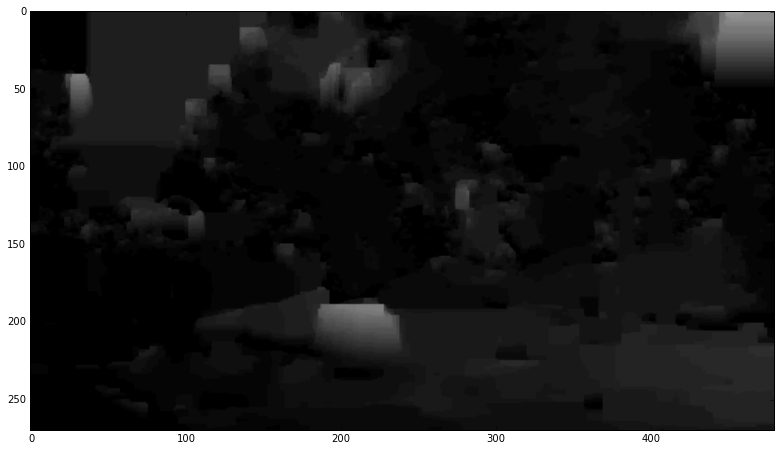

In [75]:
plt.imshow(res, cmap="Greys_r")

In [ ]:
res = get_disparity_map(50, 4000, smoothness=50)

/Users/saito/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [ ]:
plt.imshow(res, cmap=)